# Binary Prediction of Poisonous Mushrooms

Bu projemiz de mantarların zehirli olup olmadıklarını anlayan bir model geliştireceğiz.

<img src="https://i.pinimg.com/originals/91/1b/fb/911bfb23b74a57d56a8931a8b126d0ba.jpg">


Zehirli= p <br>
Değil = e

<a href ="https://www.kaggle.com/competitions/playground-series-s4e8/data">Dataya Buradan Ulaşabilirsiniz</a>

### EDA

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns",100)

import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("train.csv")

In [4]:
df.head()

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,e,8.80,f,s,u,f,a,c,w,4.51,15.39,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,1,p,4.51,x,h,o,f,a,c,n,4.79,6.48,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,2,e,6.94,f,s,b,f,x,c,w,6.85,9.93,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,3,e,3.88,f,y,g,f,s,NaN,g,4.16,6.53,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,4,e,5.85,x,l,w,f,d,NaN,w,3.37,8.36,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a


In [5]:
df.shape

(3116945, 22)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3116945 entries, 0 to 3116944
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   class                 object 
 2   cap-diameter          float64
 3   cap-shape             object 
 4   cap-surface           object 
 5   cap-color             object 
 6   does-bruise-or-bleed  object 
 7   gill-attachment       object 
 8   gill-spacing          object 
 9   gill-color            object 
 10  stem-height           float64
 11  stem-width            float64
 12  stem-root             object 
 13  stem-surface          object 
 14  stem-color            object 
 15  veil-type             object 
 16  veil-color            object 
 17  has-ring              object 
 18  ring-type             object 
 19  spore-print-color     object 
 20  habitat               object 
 21  season                object 
dtypes: float64(3), int64(1), object(18)
memory

In [7]:
df.isnull().sum()

id                            0
class                         0
cap-diameter                  4
cap-shape                    40
cap-surface              671023
cap-color                    12
does-bruise-or-bleed          8
gill-attachment          523936
gill-spacing            1258435
gill-color                   57
stem-height                   0
stem-width                    0
stem-root               2757023
stem-surface            1980861
stem-color                   38
veil-type               2957493
veil-color              2740947
has-ring                     24
ring-type                128880
spore-print-color       2849682
habitat                      45
season                        0
dtype: int64

In [8]:
df["class"].value_counts()

class
p    1705396
e    1411549
Name: count, dtype: int64

<Axes: xlabel='class', ylabel='count'>

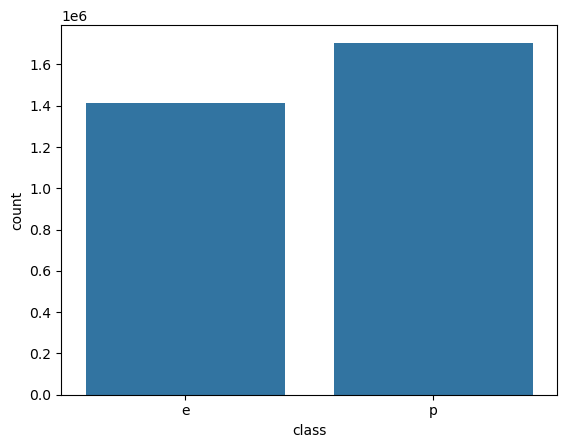

In [9]:
sns.countplot(x=df["class"])


### Feature Engineering

Fazla boş olan sütunları kaldırıyorum

In [10]:
df=df.drop(["spore-print-color","veil-color","veil-type","stem-surface","stem-root","gill-spacing","cap-surface","gill-attachment","ring-type"],axis=1)

Simdi de kalan bos verileri dolduruyorum

In [11]:
df.isnull().sum()

id                       0
class                    0
cap-diameter             4
cap-shape               40
cap-color               12
does-bruise-or-bleed     8
gill-color              57
stem-height              0
stem-width               0
stem-color              38
has-ring                24
habitat                 45
season                   0
dtype: int64

In [12]:
df["cap-diameter"].value_counts()

cap-diameter
1.49     8164
3.18     7942
3.14     7361
1.51     7072
4.04     6828
         ... 
58.19       1
31.59       1
24.93       1
58.76       1
54.07       1
Name: count, Length: 3913, dtype: int64

In [13]:
df["cap-diameter"]=df["cap-diameter"].fillna(1.49)

In [14]:
df["cap-shape"].value_counts()

cap-shape
x        1436026
f         676238
s         365146
b         318646
o         108835
          ...   
12.62          1
5.15           1
19.04          1
49.21          1
19.06          1
Name: count, Length: 74, dtype: int64

In [15]:
df["cap-shape"]=df["cap-shape"].fillna("x")

In [16]:
df["does-bruise-or-bleed"].value_counts()

does-bruise-or-bleed
f           2569743
t            547085
w                14
c                11
h                 9
a                 7
b                 7
x                 7
y                 7
k                 6
s                 6
e                 4
l                 4
p                 4
d                 4
g                 3
z                 3
o                 3
i                 2
n                 2
r                 1
has-ring          1
3.43              1
4.42              1
2.9               1
u                 1
Name: count, dtype: int64

In [17]:
df["does-bruise-or-bleed"]=df["does-bruise-or-bleed"].fillna("f")

In [18]:
df["cap-color"].value_counts()

cap-color
n             1359542
y              386627
w              379442
g              210825
e              197290
               ...   
3.95                1
6.59                1
5.25                1
veil-color          1
9.02                1
Name: count, Length: 78, dtype: int64

In [19]:
df["cap-color"]=df["cap-color"].fillna("n")

In [20]:
df["gill-color"].value_counts()

gill-color
w       931538
n       543386
y       469464
p       343626
g       212164
         ...  
9.46         1
5.01         1
3.4          1
17           1
8.37         1
Name: count, Length: 63, dtype: int64

In [21]:
df["gill-color"]=df["gill-color"].fillna("w")

In [22]:
df["stem-color"].value_counts()

stem-color
w                    1196637
n                    1003464
y                     373971
g                     132019
o                     111541
e                     103373
u                      67017
p                      54690
k                      33676
r                      22329
l                       9994
b                       7365
f                        573
s                         51
t                         40
a                         36
x                         20
i                         19
d                         16
h                         12
m                         11
c                          7
z                          6
ring-type                  3
class                      2
spore-print-color          2
is n                       1
6.31                       1
12.92                      1
3.98                       1
20.07                      1
7.7                        1
22.6                       1
6.09                       1
17.

In [23]:
df["stem-color"]=df["stem-color"].fillna("w")

In [24]:
df["has-ring"].value_counts()

has-ring
f             2368820
t              747982
r                  16
h                  13
c                  11
l                  11
s                  11
p                  11
g                   8
z                   6
e                   6
x                   5
m                   4
y                   3
d                   3
k                   2
o                   2
n                   2
f has-ring          1
i                   1
10.3                1
w                   1
a                   1
Name: count, dtype: int64

In [25]:
df["has-ring"]=df["has-ring"].fillna("f")

In [26]:
df["habitat"].value_counts()

habitat
d                       2177573
g                        454908
l                        171892
m                        150969
h                        120137
w                         18530
p                         17180
u                          5264
e                            55
s                            52
n                            41
t                            40
r                            38
y                            34
a                            34
k                            31
c                            26
b                            18
o                            12
f                            11
i                             7
x                             5
z                             5
habitat                       5
class                         3
spore-print-color             3
ring-type                     2
18.35                         1
3.68                          1
2.44                          1
1.66                          1


In [27]:
df["habitat"]=df["habitat"].fillna("d")

In [28]:
d={"p":1, "e":0}

In [29]:
df["class"]=df["class"].map(d)

In [30]:
df.head()

,id,class,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-color,stem-height,stem-width,stem-color,has-ring,habitat,season
0,0,0,8.80,f,u,f,w,4.51,15.39,w,f,d,a
1,1,1,4.51,x,o,f,n,4.79,6.48,o,t,d,w
2,2,0,6.94,f,b,f,w,6.85,9.93,n,f,l,w
3,3,0,3.88,f,g,f,g,4.16,6.53,w,f,d,u
4,4,0,5.85,x,w,f,w,3.37,8.36,w,f,g,a


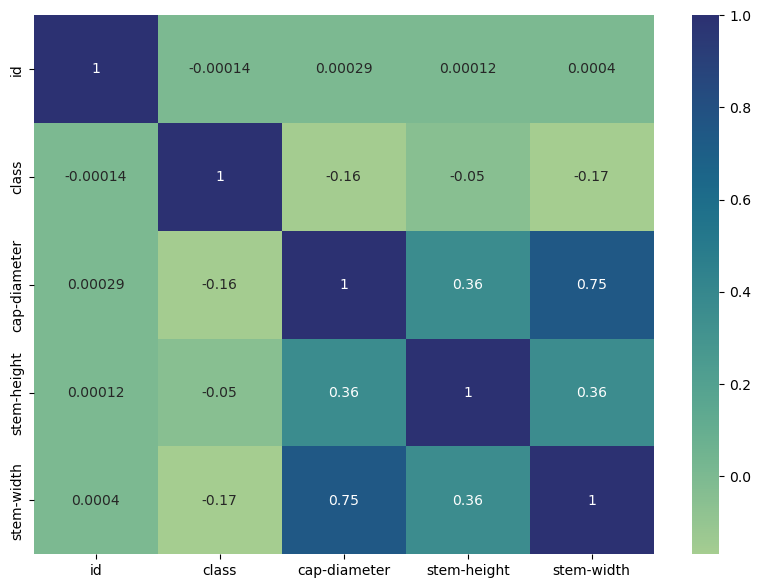

In [31]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(numeric_only=True),annot=True, cmap="crest");

In [32]:
# Veri cok buyuk oldugu icin biraz kucultuyorum

In [33]:
df.shape

(3116945, 13)

In [34]:
df=df.sample(500000)

In [35]:
from sklearn.preprocessing import LabelEncoder

In [36]:
le=LabelEncoder()

In [37]:
df["cap-color"]= le.fit_transform(df["cap-color"])

In [38]:
df["cap-shape"]= le.fit_transform(df["cap-shape"])

In [39]:
df["does-bruise-or-bleed"]= le.fit_transform(df["does-bruise-or-bleed"])

In [40]:
df["gill-color"]= le.fit_transform(df["gill-color"])

In [41]:
df["stem-color"]= le.fit_transform(df["stem-color"])

In [42]:
df["has-ring"]= le.fit_transform(df["has-ring"])

In [43]:
df["habitat"]= le.fit_transform(df["habitat"])

In [44]:
df["season"]= le.fit_transform(df["season"])

In [61]:
x=df.drop(["id","class"],axis=1)
y=df["class"]

### Modelling

In [47]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def algo_test_classification(X, y):
    # Bütün sınıflandırma modellerini tanımlıyorum
    lr = LogisticRegression()
    svc = SVC()
    knn = KNeighborsClassifier()
    dt = DecisionTreeClassifier()
    rf = RandomForestClassifier()
    gb = GradientBoostingClassifier()
    xgb = XGBClassifier()
    mlp = MLPClassifier()

    algos = [lr, svc, knn, dt, rf, gb, xgb, mlp]
    algo_names = ['Logistic Regression', 'SVC', 'KNN', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'XGBoost', 'MLP']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    accuracy = []
    precision = []
    recall = []
    f1 = []

    # Sonuç tablosunu oluşturuyorum
    result = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1'], index=algo_names)

    for algo in algos:
        algo.fit(X_train, y_train)
        y_pred = algo.predict(X_test)
        accuracy.append(accuracy_score(y_test, y_pred))
        precision.append(precision_score(y_test, y_pred))
        recall.append(recall_score(y_test, y_pred))
        f1.append(f1_score(y_test, y_pred))

    # Sonuçları result tablosuna ekliyorum
    result['Accuracy'] = accuracy
    result['Precision'] = precision
    result['Recall'] = recall
    result['F1'] = f1

    # Sonuçları doğruluk oranına göre sıralayıp döndürüyorum
    return result.sort_values('Accuracy', ascending=False)

In [39]:
algo_test_classification(x,y)

,Accuracy,Precision,Recall,F1
Random Forest,0.97835,0.981263,0.979091,0.980176
XGBoost,0.97430,0.977735,0.975195,0.976463
Decision Tree,0.96171,0.965378,0.964548,0.964963
Gradient Boosting,0.86384,0.875627,0.875242,0.875435
Logistic Regression,0.61767,0.630208,0.727472,0.675356
MLP,0.54684,0.546774,0.999689,0.706909
SVC,0.54666,0.546660,1.000000,0.706891
KNN,0.51457,0.552767,0.586672,0.569215


In [62]:
rf = RandomForestClassifier()

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [64]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [65]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [66]:
mod=rf.fit(x_train,y_train)

In [67]:
thmn=rf.predict(x_test)

In [68]:
accuracy_score(y_test, thmn)

0.97836

In [69]:
confusion_matrix(thmn,y_test)

array([[44236,  1118],
       [ 1046, 53600]], dtype=int64)

<Axes: >

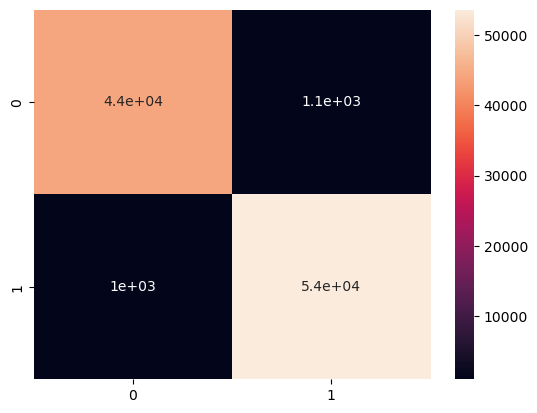

In [70]:
sns.heatmap(confusion_matrix(thmn,y_test),annot=True)

In [71]:
print(classification_report(thmn,y_test))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     45354
           1       0.98      0.98      0.98     54646

    accuracy                           0.98    100000
   macro avg       0.98      0.98      0.98    100000
weighted avg       0.98      0.98      0.98    100000



In [72]:
import pickle

In [73]:
pickle.dump(mod,open("mantar.pkl","wb")) 

In [348]:
test=pd.read_csv("test.csv")

In [349]:
test=test.drop(["spore-print-color","veil-color","veil-type","stem-surface","stem-root","gill-spacing","cap-surface","gill-attachment","ring-type"],axis=1)

In [350]:
test["cap-diameter"]=test["cap-diameter"].fillna(1.49)

In [351]:
test["cap-shape"]=test["cap-shape"].fillna("x")

In [352]:
test["does-bruise-or-bleed"]=test["does-bruise-or-bleed"].fillna("f")

In [353]:
test["cap-color"]=test["cap-color"].fillna("n")

In [354]:
test["gill-color"]=test["gill-color"].fillna("w")

In [355]:
test["stem-color"]=test["stem-color"].fillna("w")

In [356]:
test["has-ring"]=test["has-ring"].fillna("f")

In [357]:
test["habitat"]=test["habitat"].fillna("d")

In [358]:
test["cap-color"]= le.fit_transform(test["cap-color"])

In [359]:
test["cap-shape"]= le.fit_transform(test["cap-shape"])

In [360]:
test["does-bruise-or-bleed"]= le.fit_transform(test["does-bruise-or-bleed"])

In [361]:
test["gill-color"]= le.fit_transform(test["gill-color"])

In [362]:
test["stem-color"]= le.fit_transform(test["stem-color"])

In [363]:
test["has-ring"]= le.fit_transform(test["has-ring"])

In [364]:
test["habitat"]= le.fit_transform(test["habitat"])

In [365]:
test["season"]= le.fit_transform(test["season"])

In [366]:
test

,id,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-color,stem-height,stem-width,stem-color,has-ring,habitat,season
0,3116945,8.64,59,44,18,52,11.13,17.12,51,17,16,0
1,3116946,6.90,50,45,5,54,1.27,10.75,38,6,16,0
2,3116947,2.00,36,44,5,41,6.18,3.14,38,6,16,1
3,3116948,3.47,59,44,5,41,4.98,8.51,51,17,16,2
4,3116949,6.17,59,55,5,54,6.73,13.70,53,17,16,2
...,...,...,...,...,...,...,...,...,...,...,...,...
2077959,5194904,0.88,59,53,5,52,2.67,1.35,29,6,16,2
2077960,5194905,3.12,59,53,5,52,2.69,7.38,51,6,19,0
2077961,5194906,5.73,59,34,5,52,6.16,9.74,53,17,16,0
2077962,5194907,5.03,36,44,5,31,6.00,3.46,31,6,16,0


In [373]:
dosya=pd.DataFrame()

In [374]:
dosya["id"]=test["id"]

In [379]:
dosya

,id,class
0,3116945,1
1,3116946,1
2,3116947,1
3,3116948,1
4,3116949,0
...,...,...
2077959,5194904,1
2077960,5194905,1
2077961,5194906,1
2077962,5194907,1


In [376]:
dosya["class"]=rf.predict(test)

In [380]:
dt={1:"p", 0:"e"}

In [381]:
dosya["class"]=dosya["class"].map(dt)

In [383]:
dosya.to_csv("tahmin.csv",index=False)

#### Derin Ogrenme

In [63]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [64]:
model=Sequential()
model.add(Dense(120,activation="relu"))  # Modele layer ekliyor # Dense bütün nöronlar bütün nöronlara bağlansın demek
model.add(Dense(80,activation="relu")) # 120 nöron var 
model.add(Dense(64,activation="relu"))
model.add(Dense(30,activation="relu"))
model.add(Dense(20,activation="relu"))
model.add(Dense(4,activation="relu"))
model.add(Dense(1,activation="sigmoid")) # Binary classification olduğu için sigmoid kullandık ! Regression da yok
model.compile(loss="binary_crossentropy", optimizer="adam",metrics=["accuracy"]) # Loss: hata MSE gibi # Optimizer=adam : Gradient Descend -> sonuca 
                                  

In [66]:
from sklearn.preprocessing import normalize, scale

In [67]:
x=scale(x) # hepsini aynı birime getirdik

In [69]:
history=model.fit(x,y,epochs=75,batch_size=23, validation_split=.20, verbose=1) # epochs: Nöronlar areasında kaç kere dolaşacağını göstryr
                                                                         # batc_size: Veriler  büyük olduğu için veriyi eşit parçalara bölüyor
                                                                         # validation_split=.20: Verilerin 80% i eğitim 20% test için ayırıyor 
                                                                         # verbose : Aşağıda yazılar çıkıyor, bize hangi basamakta olduğumuzu söylüyor

Epoch 1/75
17392/17392 ━━━━━━━━━━━━━━━━━━━━ 15s 840us/step - accuracy: 0.9815 - loss: 0.0615 - val_accuracy: 0.9771 - val_loss: 0.0802
Epoch 2/75
17392/17392 ━━━━━━━━━━━━━━━━━━━━ 15s 838us/step - accuracy: 0.9811 - loss: 0.0623 - val_accuracy: 0.9775 - val_loss: 0.0898
Epoch 3/75
17392/17392 ━━━━━━━━━━━━━━━━━━━━ 15s 833us/step - accuracy: 0.9812 - loss: 0.0615 - val_accuracy: 0.9769 - val_loss: 0.0870
Epoch 4/75
17392/17392 ━━━━━━━━━━━━━━━━━━━━ 14s 822us/step - accuracy: 0.9814 - loss: 0.0613 - val_accuracy: 0.9776 - val_loss: 0.0796
Epoch 5/75
17392/17392 ━━━━━━━━━━━━━━━━━━━━ 14s 822us/step - accuracy: 0.9813 - loss: 0.0610 - val_accuracy: 0.9771 - val_loss: 0.0861
Epoch 6/75
17392/17392 ━━━━━━━━━━━━━━━━━━━━ 15s 844us/step - accuracy: 0.9812 - loss: 0.0619 - val_accuracy: 0.9774 - val_loss: 0.1011
Epoch 7/75
17392/17392 ━━━━━━━━━━━━━━━━━━━━ 15s 867us/step - accuracy: 0.9812 - loss: 0.0619 - val_accuracy: 0.9771 - val_loss: 0.0902
Epoch 8/75
17392/17392 ━━━━━━━━━━━━━━━━━━━━ 15s 835us/s

In [70]:
import matplotlib.pyplot as plt

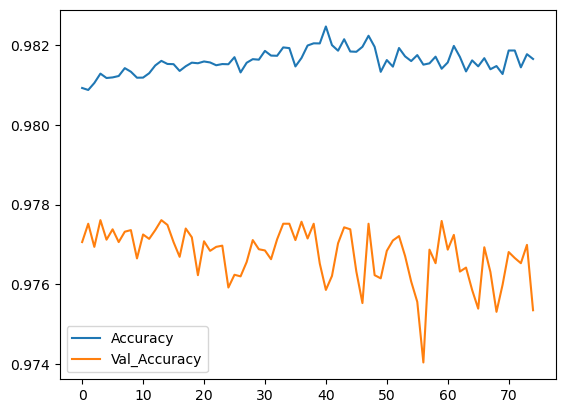

In [71]:
plt.plot(history.history["accuracy"],label="Accuracy")    
plt.plot(history.history["val_accuracy"],label="Val_Accuracy")
plt.legend()

Sonuc olarak verimizi ayarlayıp modelimizi önce normal bir şekilde eğittik %97.82 Accuracy Score aldık. Sonra da derin öğrenme kullanarak modelimizi eğittik ve %98.28 Accuracy Score aldık.